Случайность в вероятности и на практике
О подходах к понятию случайности:

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf


Генераторы случайных чисел


Что происходит при вызове, напрмер, np.random.rand()?

Как устроен источник случайной последовательности?

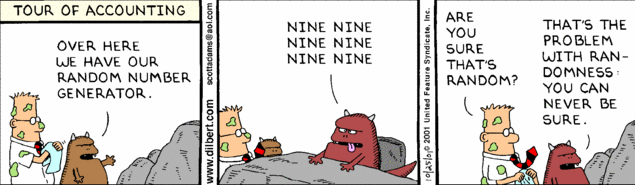

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции rand() в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:  zi+1=(azi+c)modm

Число z0 называется seed и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [156]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m


rng.current = 1

In [157]:
#первые элементы последовательности
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

In [158]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


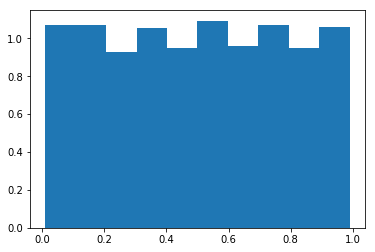

In [159]:
import matplotlib.pyplot as plt
plt.hist(random, normed=True)
plt.show()

видно, что на спектралоном тесте точки находятся на гиперплоскостях, что не очень похоже на случайность


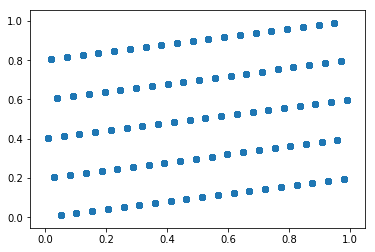

In [160]:
plt.scatter(random[1:], random[:-1])
plt.show()

попробуем подобрать более случайное распределение 

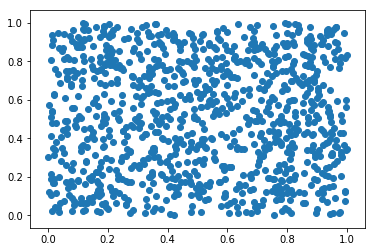

In [161]:

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты Diehard tests.

Больше методов генерации собрано здесь.

# Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?

Задача: Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.
    

In [162]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

# Упорядоченные веса



Time of generation =  0.0005023479461669922


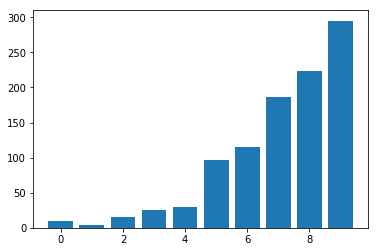

In [163]:
start = time.time()
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
probabilities = [0.12, 0.3, 0.167, 0.024, 0.031,0.23, 0.01, 0.02, 0.008, 0.09]
probabilities.sort()
random = np.random.choice(elements, 1000, p=probabilities)
random_list=list(random)
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [random_list.count(i) for i in range(10)])
plt.show()

# Неупорядоченные веса

Time of generation =  0.0


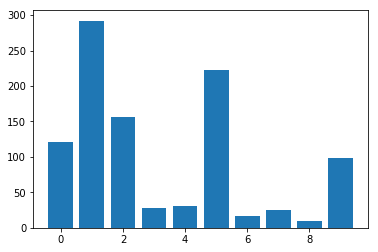

In [164]:
start = time.time()
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
probabilities = [0.12, 0.3, 0.167, 0.024, 0.031,0.23, 0.01, 0.02, 0.008, 0.09]
random = np.random.choice(elements, 1000, p=probabilities)
random_list=list(random)
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [random_list.count(i) for i in range(10)])
plt.show()

# Inverse transform method# 

В следующем предложении заключается идея метода inverse transform:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)



# задача


Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

[0.         0.00500501 0.01001001 0.01501502 0.02002002 0.02502503
 0.03003003 0.03503504 0.04004004 0.04504505]


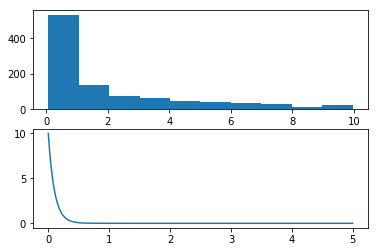

In [165]:
import random
import math as m
l=10
def exp_dist(x):
    if x>=0:
        return m.exp(-l*x)*l
    else:
        return 0
arg=[random.uniform(0, 0.5) for i in range(1000)]
s=[exp_dist(arg[i]) for i in range(1000)]
x=np.linspace(0,5,1000)
s1=[exp_dist(x[i]) for i in range(1000)]
print(x[:10])
plt.subplot(2,1,1)
plt.hist(s)
plt.subplot(2,1,2)
plt.plot(x,s1)
plt.show()


совместный график

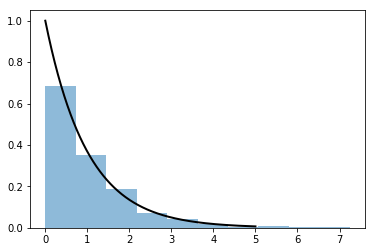

In [166]:

from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5)
# ax.legend(r,loc='best', frameon=False)
plt.show()

# Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:

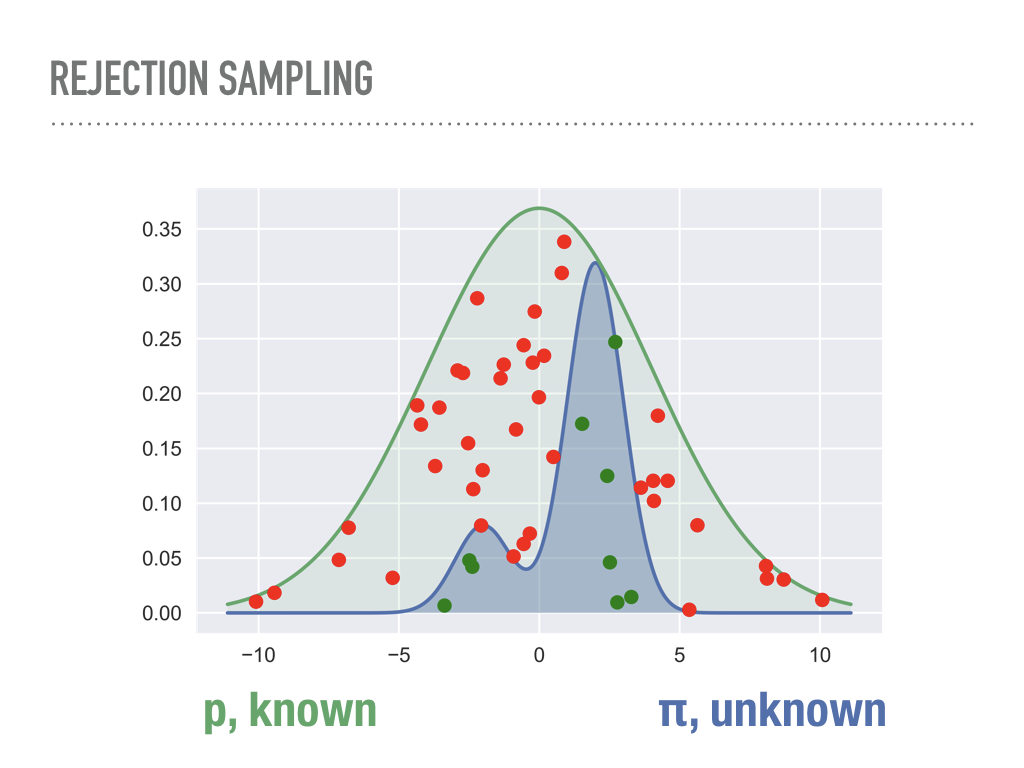

# задача


Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

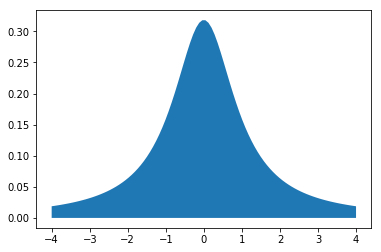

In [167]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

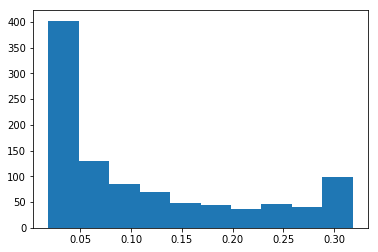

In [168]:
arg=[random.uniform(-4, 4) for i in range(1000)]
s=[dist.pdf(arg[i]) for i in range(1000)]
plt.hist(s)
plt.show()

# Coordinate transformation method#

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива - попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

# Задача

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

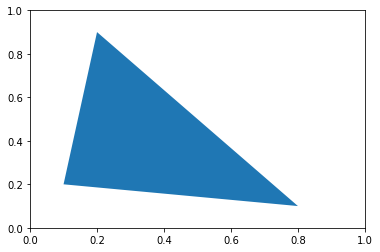

In [169]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

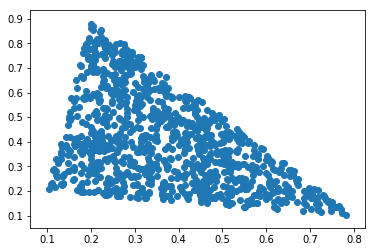

In [170]:
def point_in_triangle():
    s, t = sorted([random.random(), random.random()])
    return (s * 0.1 + (t-s)*0.2 + (1-t)*0.8,
            s * 0.2 + (t-s)*0.9 + (1-t)*0.1)
s=[point_in_triangle() for i in range(1000)]
s=np.array(s)
plt.scatter(s[::, :1], s[::, 1:2])
plt.show()

# Задача

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

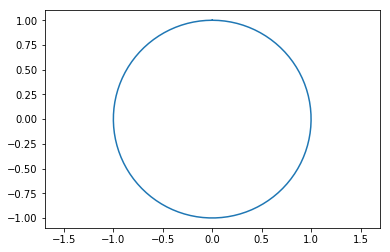

In [171]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

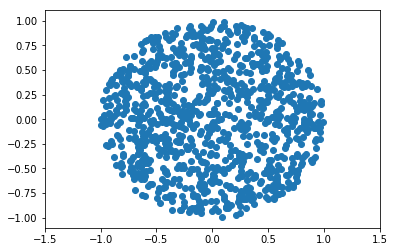

In [172]:
def point_in_circle():
    t=m.pi*2*random.random()
    r=m.sqrt(random.random())
    return [r*m.cos(t), r*m.sin(t)]
s=[point_in_circle() for i in range(1000)]
s[:14]
s=np.array(s)
plt.scatter(s[::, :1], s[::, 1:2])
plt.xlim(-1.5, 1.5)
plt.show()

# Задача


Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

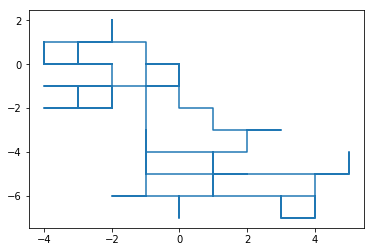

In [173]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import itertools
x=np.ones(100)
y=np.ones(100)
x[np.random.choice(100, 50, replace=False)]=-1
y[np.random.choice(100, 50, replace=False)]=-1
x=list(itertools.accumulate(x))
y=list(itertools.accumulate(y))
x.insert(0,0)
y.insert(0,0)
for j in range(101):
    x[j],y[j]=(x[j]/m.sqrt(2)+y[j]/m.sqrt(2))/m.sqrt(2), (-x[j]/m.sqrt(2)+y[j]/m.sqrt(2))/m.sqrt(2) 
plt.plot(x,y)
plt.show()

# Random normal generator

# задача

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

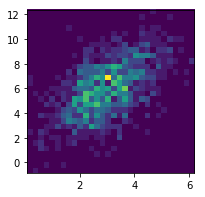

In [174]:
n=1000
u1=np.zeros(1000)
u2=np.zeros(1000)
i=0
while i<n:
    u,v=2*np.random.rand(2,1)-1
    s=u**2+v**2
    if 0<s<=1:
        u1[i]=u
        u2[i]=v
        i+=1
    
s=u1**2+u2**2
x=u1*np.sqrt(-2*np.log(s)/s)
y=u2*np.sqrt(-2*np.log(s)/s)

#смоделируем нужную выборку, решив систему из ковариационной матрицы и положив a22=0
#z0=a11*x+a12*y
#z1=a21*x+a22*y
#E(a21*x+a22*y)^2=4 => a21=2
#.....
#a11=1/2
#a12=sqrt(3)/2
a22=0
a21=2
a11=1/2
a12=m.sqrt(3)/2
z0=a11*x+a12*y+3
z1=a21*x+a22*y+6
plt.figure(figsize=(3,3))
plt.hist2d(z0, z1, bins=30)
plt.show()

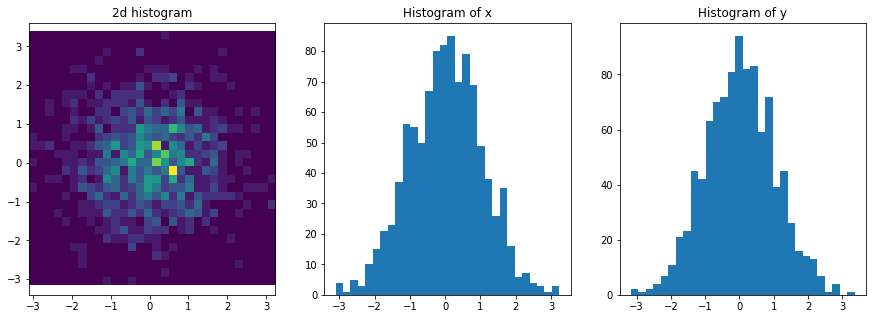

In [175]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
#ax[0].scatter(x,y)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

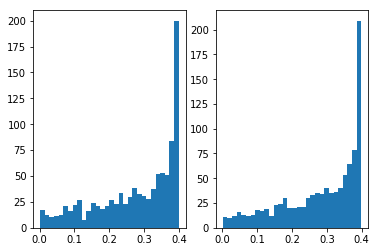

In [176]:

newx = np.sqrt(1/(2*np.pi))*np.exp(-x**2/2)
newy = np.sqrt(1/(2*np.pi))*np.exp(-y**2/2)

plt.subplot(1,2,1)
plt.hist(newx,bins = 30)
plt.subplot(1,2,2)
plt.hist(newy,bins = 30)
plt.show()

# Практическое задание

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [177]:
n=100
def into_subsets(n):
    Bell_num = 0
    for i in range(1,100):
        Bell_num+=i**n/np.math.factorial(i)
    Bell_num*=1/np.exp(1)
    prob=np.array([i**n/(np.math.factorial(i)*np.exp(1)*Bell_num) for i in range(1,101)])
    summ=[prob[:i].sum() for i in range(1,101)]
    r=np.random.rand()
    k=0
    while k!=-1:
        if r<summ[k]:
            r=k+1
            k=-1
        else:
            k+=1
    prob=np.array([1/r for i in range(r)])
    summ=[prob[:i].sum() for i in range(1,r+1)]
    a=np.array([np.random.rand() for i in range(n)])
    c=[]
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ[k]:
                c.append(k)
                k=-1
            else:
                k+=1
    return c

expected=0
for i in range(10000):
    c=into_subsets(n)
    expected+=len(np.unique(c))
expected/=10000
print(expected)

28.6072
